### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET

In [2]:
data = pd.read_csv("D:\smart internz-internship\HR_comma_sep.csv")

In [3]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### FINDING THE MISSING VALUES

In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### HANDLING CATEGORICAL VALUES

In [6]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
data['Department'].describe()

count     14999
unique       10
top       sales
freq       4140
Name: Department, dtype: object

In [9]:
data['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
data['Department'] = data['Department'].replace({'support':'technical'})

In [11]:
data['Department'].value_counts()

technical      4949
sales          4140
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [12]:
data['Department'] = data['Department'].replace({'IT':'technical'})

In [13]:
data['Department'].value_counts()

technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [14]:
print(data['Department'].unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


### LABEL ENCODING

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Department'] = le.fit_transform(data['Department'])
data['salary'] = le.fit_transform(data['salary'])

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,6,1
1,0.80,0.86,5,262,6,0,1,0,6,2
2,0.11,0.88,7,272,4,0,1,0,6,2
3,0.72,0.87,5,223,5,0,1,0,6,1
4,0.37,0.52,2,159,3,0,1,0,6,1


### DATA EXPLORATION

In [17]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [18]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.309853,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,5.451694,1.345842


In [19]:
data.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
Department,,,,,,,,,
0,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,1.407878
1,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,1.340287
2,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,1.424899
3,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,1.000000
4,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,1.344988
5,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,1.349224
6,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,1.363043
7,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258,1.356056


In [20]:
data.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
salary,,,,,,,,,
0,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205,4.921584
1,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021,5.455714
2,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079,5.297394


### DATA VISUALIZATION

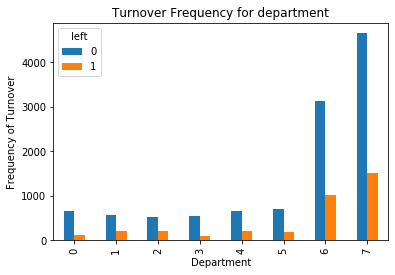

In [21]:
pd.crosstab(data.Department,data.left).plot(kind='bar')
plt.title('Turnover Frequency for department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

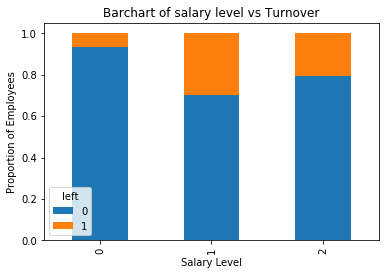

In [22]:
table = pd.crosstab(data.salary,data.left)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Barchart of salary level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.show()

In [23]:
pd.crosstab(data.Department,data.left)

left,0,1
Department,,
0,666,121
1,563,204
2,524,215
3,539,91
4,655,203
5,704,198
6,3126,1014
7,4651,1525


### SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [24]:
x=data.drop(['left'],axis=1)
y=data['left']

In [25]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,6,1
1,0.80,0.86,5,262,6,0,0,6,2
2,0.11,0.88,7,272,4,0,0,6,2
3,0.72,0.87,5,223,5,0,0,6,1
4,0.37,0.52,2,159,3,0,0,6,1


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### SPLITTING THE DATASET INTO TRAIN SET AND TEST SET

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### MODEL BUILDING

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

C:\Users\zolaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_test

1670     1
13378    0
10233    0
4719     0
7003     0
        ..
14035    0
8469     0
12453    1
9431     0
4202     0
Name: left, Length: 3000, dtype: int64

In [30]:
y_pred = rf.predict(x_test)

In [36]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
1670,0.44,0.57,2,141,3,0,0,5,2
13378,0.55,0.96,3,194,3,0,0,5,2
10233,0.72,0.67,5,210,2,0,0,3,2
4719,0.96,0.75,4,177,2,0,0,7,1
7003,0.96,0.54,3,198,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14035,0.75,0.79,4,263,3,0,1,4,2
8469,0.92,0.49,5,178,2,1,0,0,2
12453,0.37,0.54,2,145,3,0,0,0,2
9431,0.52,0.61,4,163,2,0,0,7,1


In [31]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2292,    7],
       [  26,  675]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2299
           1       0.99      0.96      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [34]:
import pickle
pickle.dump(rf, open("demo.pkl", 'wb'))